# Data analysis of Delhi NCR real estate dataset

#### This notebook is addresses the price variation with different features and data modelling. We will use to predict the price of the property. The dataset used is 'delhi-ncr-real-estate-date' which is scraped from magicbricks website.

## Libraries

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Data

In [4]:
# Load the dataset
data=pd.read_csv("real_estate_main.csv")

# Explore the data
print(data.head())
print(data.info())

   Unnamed: 0                                               Name     Price  \
0           1     4 BHK Flat for Sale in Vasant Vihar, New Delhi  85000000   
1           2  4 BHK Flat for Sale in Sushant Lok-I, Sector 4...  26500000   
2           3   3 BHK Flat for Sale in DLF City Phase 2, Gurgaon  29500000   
3           4  3 BHK Flat for Sale in Rohini Sector 24, New D...  12100000   
4           5  3 BHK Flat for Sale in Rohini Sector 8, New Delhi  25000000   

               Rate              property carpet.area         status  \
0  ₹21250 per sqft          Parnami Infra   3000 sqft  Ready to Move   
1   ₹9815 per sqft   Dolphin Real Estates   1500 sqft  Ready to Move   
2  ₹15245 per sqft      The Unique Realty   144 sqyrd  Ready to Move   
3  ₹10083 per sqft          Iconic Realty   1100 sqft  Ready to Move   
4  ₹31250 per sqft   Synergy Real Estates    750 sqft  Ready to Move   

             floor   transaction        facing  ...  ownership     parking  \
0       2 out of 4  

## Data Processing


In [5]:
# Removing Nan values and duplicates
data=data.dropna()
data=data.drop_duplicates()
# Removing similar columns
data.drop(['Name','carpet.area','Rate'],axis=1,inplace=True)
data.rename(columns={'Unnamed: 0':'Index'},inplace=True)
data=data[(data.total_area<20000)&(data.Price<700000000)]                    #Outcast values

## Exploratory Data Analysis

### Houses from different cities in NCR

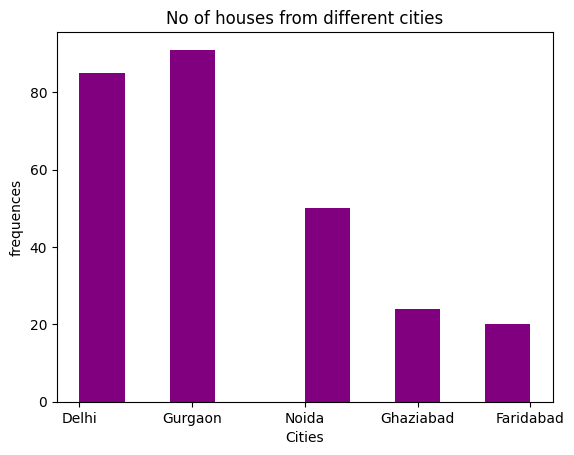

In [6]:
houses=data['city'].values
plt.hist(houses,color="purple")
plt.xticks(["Delhi","Gurgaon","Noida","Ghaziabad","Faridabad"])
plt.title("No of houses from different cities")
plt.xlabel("Cities")
plt.ylabel("frequences")
plt.show()

### Number of houses with different bedroom

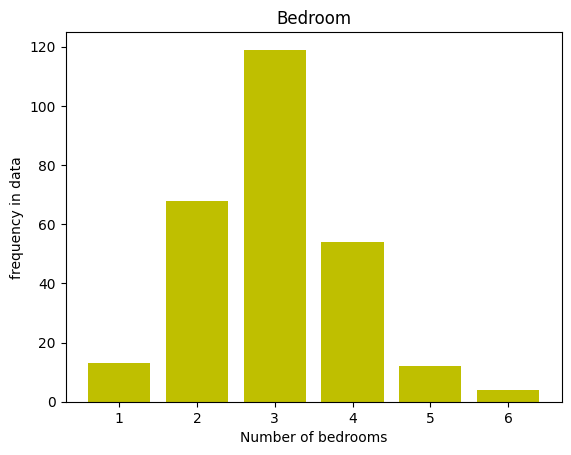

In [7]:
bedroom=data["bedroom"].values
plt.hist(bedroom, bins=range(min(bedroom), max(bedroom) + 2), rwidth=0.8, align='left',color='y')
plt.xticks(range(min(bedroom), max(bedroom) + 1))
plt.title("Bedroom")
plt.xlabel("Number of bedrooms")
plt.ylabel("frequency in data")
plt.show()

### Facing of houses

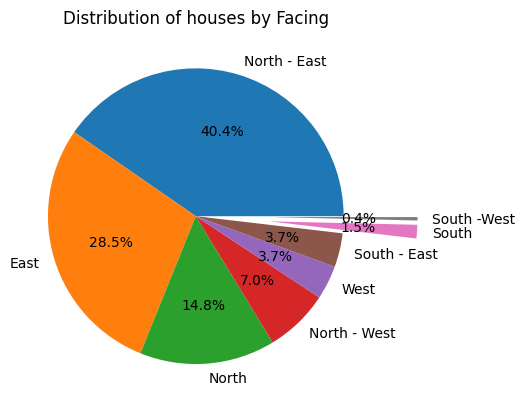

In [8]:
facing=data["facing"].values
count=pd.value_counts(facing)
explode=[0,0,0,0,0,0,0.5,0.5]
plt.pie(count,explode=explode,labels=count.index,autopct='%1.1f%%')
plt.title("Distribution of houses by Facing")
plt.show()

### Relation Between Price and Total Area

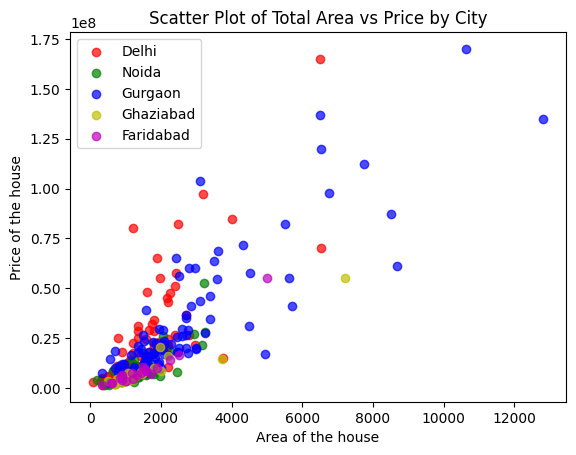

In [9]:
area=data["total_area"].values
price=data["Price"].values

city_color={"Delhi":'r',"Noida":'g',"Gurgaon":'b',"Ghaziabad":'y',"Faridabad":'m'}
cities=data["city"].map(city_color)
for city, color in city_color.items():
    plt.scatter(area[data["city"]==city], price[data["city"]==city], c=color,alpha=0.7, label=city)
plt.legend()
plt.title('Scatter Plot of Total Area vs Price by City')
plt.xlabel("Area of the house")
plt.ylabel("Price of the house")
plt.show()


### Prices for different number of bedrooms

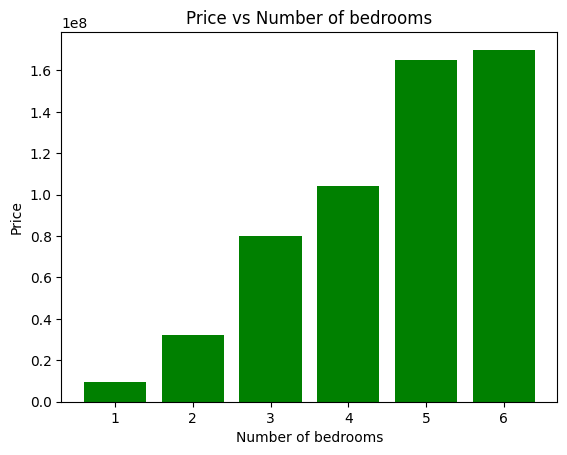

In [10]:
plt.bar(bedroom,price,color='g')
plt.title("Price vs Number of bedrooms")
plt.xlabel("Number of bedrooms")
plt.ylabel("Price")
plt.show()

### Comparing prices of Different cities

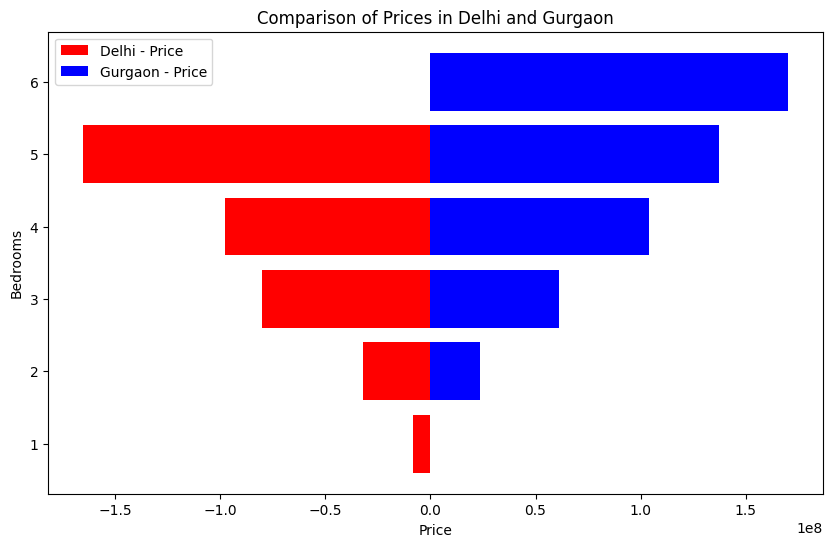

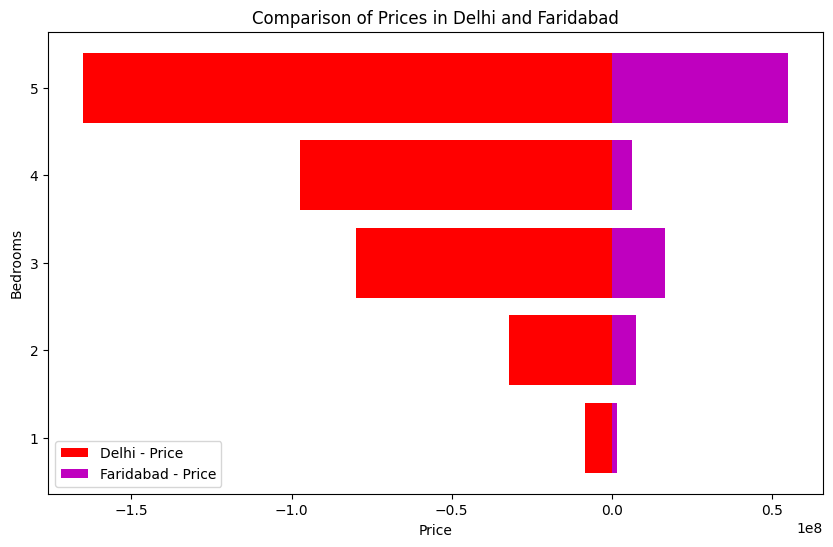

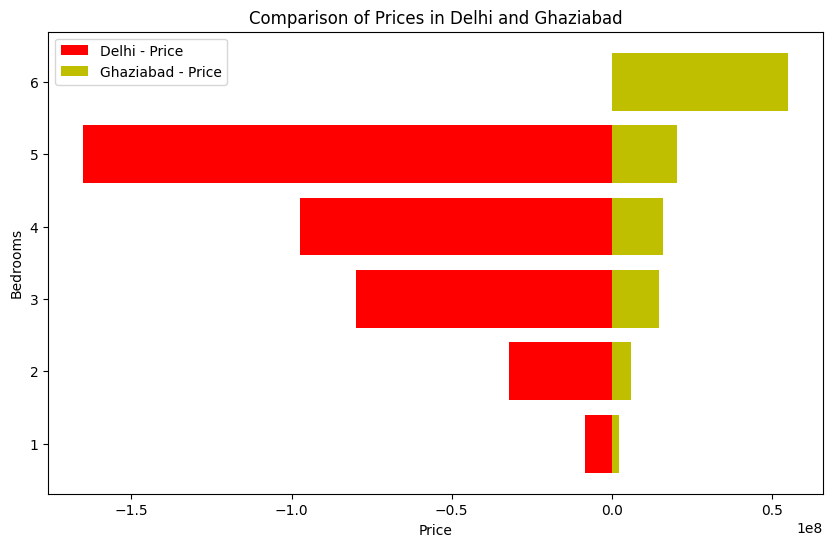

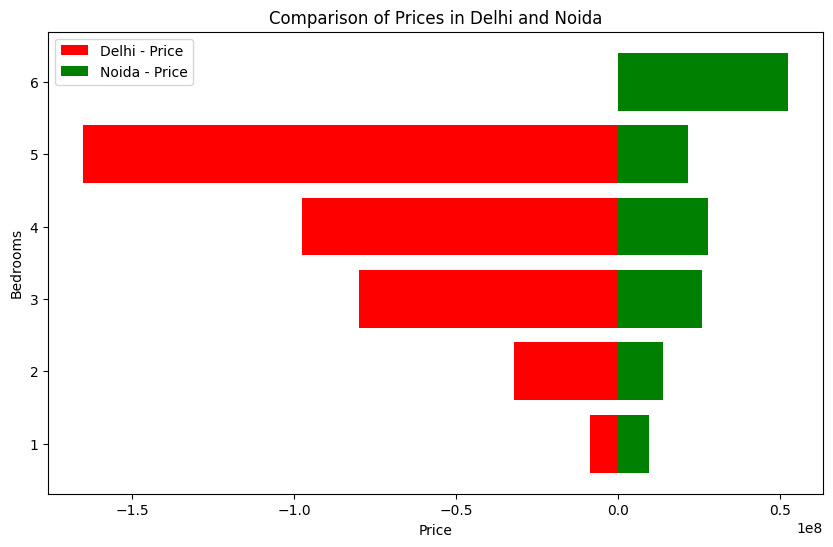

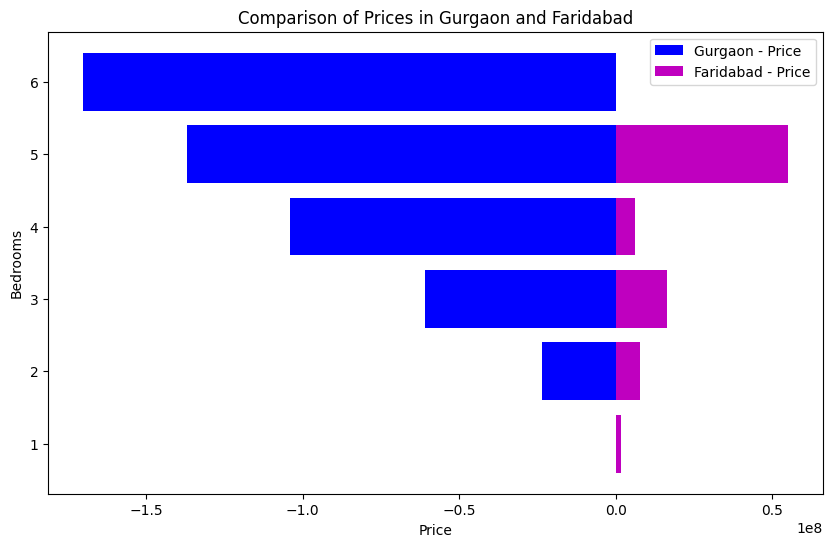

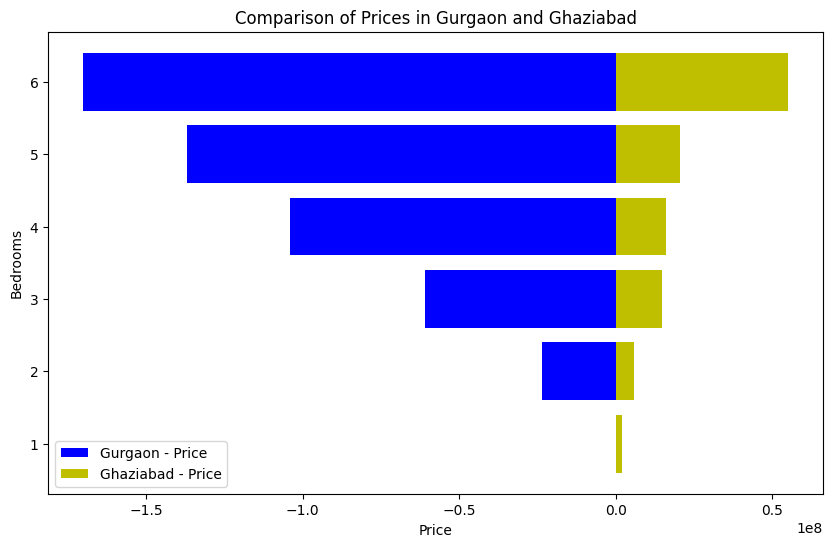

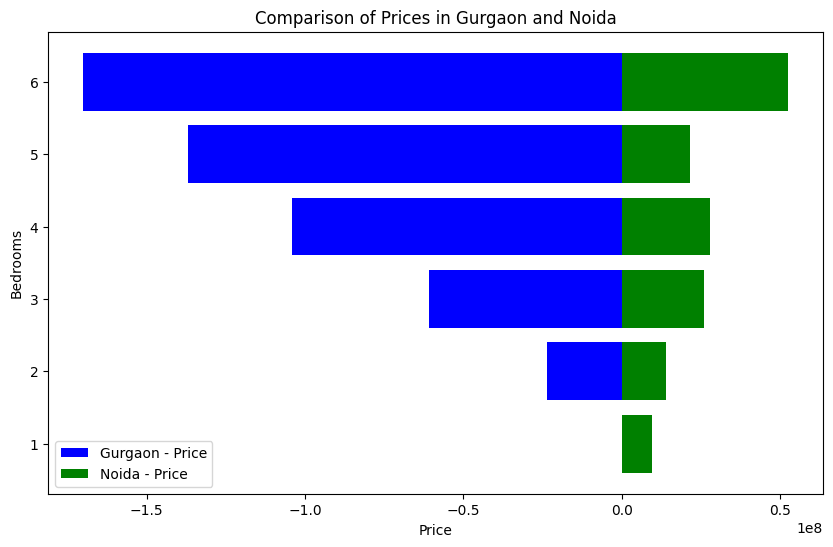

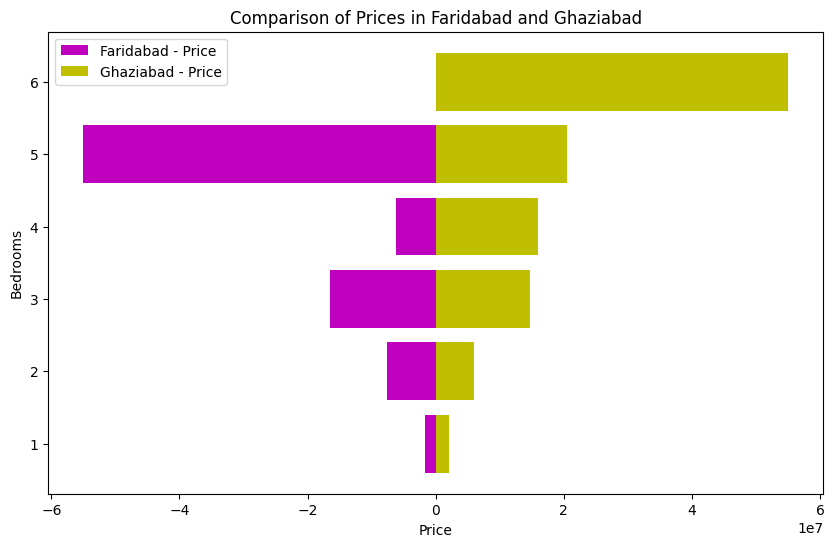

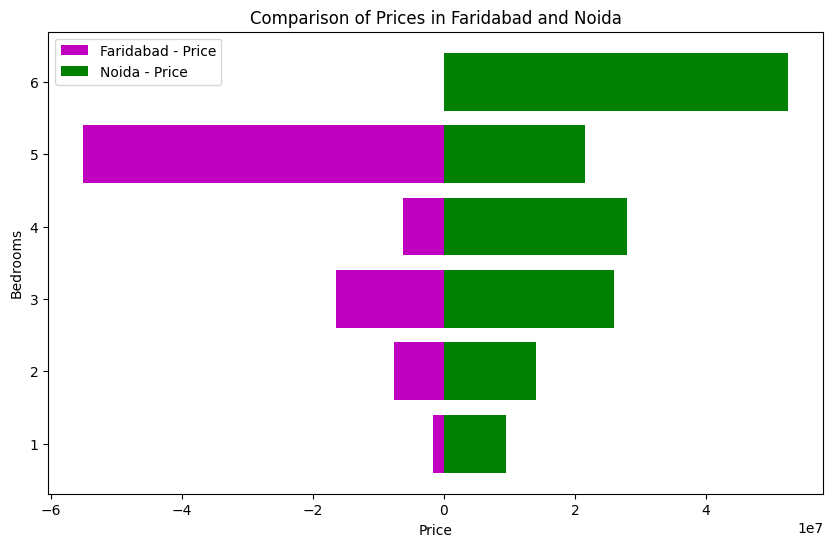

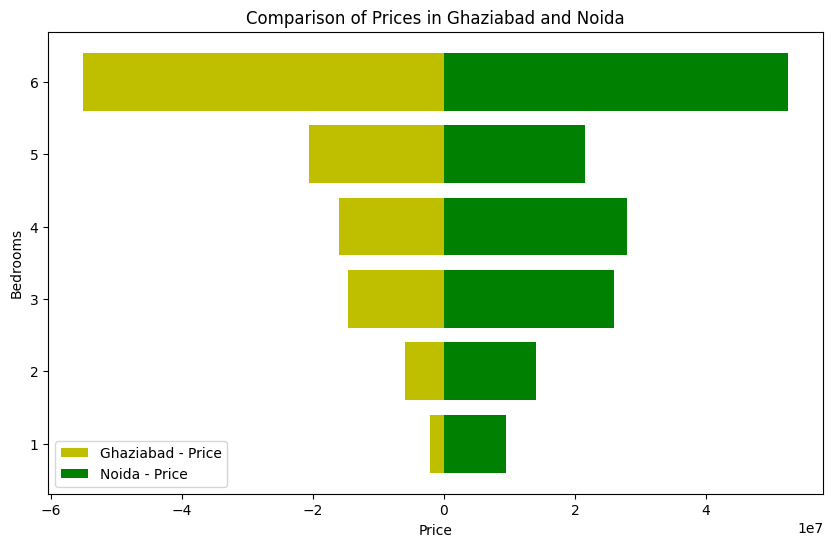

In [11]:

cities = ['Delhi', 'Gurgaon', 'Faridabad', 'Ghaziabad', 'Noida']

for i in range(len(cities) - 1):
    current_city = cities[i]
    
    for y in range(i + 1, len(cities)):
        next_city = cities[y]

        bedroom_1 = data[data.city == current_city]["bedroom"].values
        price_1 = data[data.city == current_city]["Price"].values
        bedroom_2 = data[data.city == next_city]["bedroom"].values
        price_2 = data[data.city == next_city]["Price"].values

        plt.figure(figsize=(10, 6))

        plt.barh(bedroom_1, -price_1, label=f'{current_city} - Price', color=city_color[current_city])
        plt.barh(bedroom_2, price_2, label=f'{next_city} - Price', color=city_color[next_city])

        plt.xlabel('Price')
        plt.ylabel('Bedrooms')
        plt.title(f'Comparison of Prices in {current_city} and {next_city}')
        plt.legend()

        plt.show()
